# Non-Global self-similar approximation with moments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import least_squares
from scipy.spatial.distance import directed_hausdorff

import Moment_Function as mf
import FIF_Trun as FT

Load in data from Chapter 2

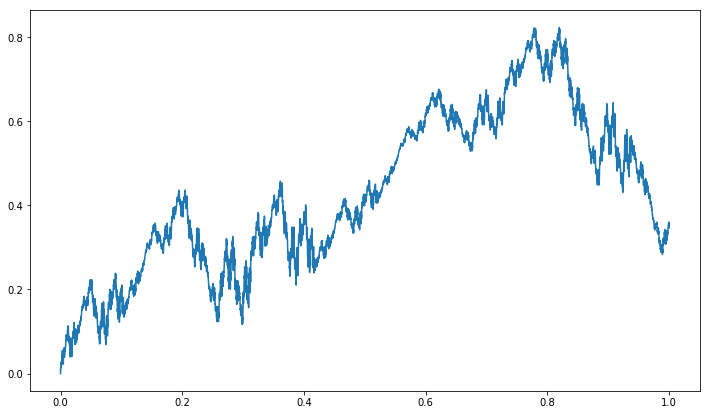

In [2]:
A_data = np.load('A.npy')
b_data = np.load('b.npy')
d_data = np.load('d.npy')


data_full = np.load('rough_data.npy')
data = data_full[data_full[:,0]<=1,:]

plt.figure(figsize=(12,7))
plt.plot(data[:,0],data[:,1])

Calculate the first 36 moments with eltons theorem of the data above

In [3]:
data_mom = mf.elt(data,size = 36)

print(data_mom)

[1.         0.5        0.42553919 0.33335    0.25607629 0.217679
 0.250025   0.18113949 0.14462554 0.12451333 0.20003    0.13811088
 0.10577778 0.08746549 0.0765646  0.1667     0.11014834 0.08129486
 0.06522437 0.05556955 0.04945745 0.14289286 0.09063187 0.06454253
 0.05032914 0.04193625 0.03662755 0.03309413 0.1250375  0.07634642
 0.05250698 0.03979068 0.03243632 0.02786309 0.02483804 0.02273889]


Define a cost function to minimise with our moments and a regularisation term

In [4]:
k1 = 0

#D = 1.5

def FIF_cost(x):
    
    global k1, D, N
    
    if k1%20 == 0 :
        print('Current parameters:')
        print('x points:')
        print(np.round(x[:N+1], 2))
        print('y points:')
        print(np.round(x[N+1:2*N+2], 2))
        print('d values:')
        print(np.round(x[2*N+2:], 2))
        
    k1+=1
    
    Phi_k, a_l = FT.FIF_wrap(x)
    
    d_l = x[2*N+2:]
    
    #dim_cost = np.dot( np.power(a_l, D - 1), np.abs(d_l) ) - 1   
    
    mom_cost = Phi_k@data_mom - data_mom

    reg = 0.1*(x - x0)
        
    return  np.hstack((mom_cost,reg))

We approximate our data with a FIF made from 6 maps, this gives the same amount of free variables given in Chapter 2 with FIC from 16 maps

In [5]:
#number of maps 
N = 6

x0 = np.linspace(0,1,N+1)
idx = FT.find_nearest_v(x0,data[:,0])

x0_x = data[idx,0]
x0_y = data[idx,1]

#d values from chapter 2
if N == 6:
    x0_d = np.array([0.34,-0.5,-0.42,0.5,0.46,-0.36])

else:
    x0_d = np.zeros(N)
    
x0 = np.hstack((x0_x,x0_y,x0_d))

We can restrict the interpolation points to lie in a `grid', but instead we use regularisation to improve our previous model. This can be uncommented and experimented with should the reader desire. It is interesting to reduce N and let these points vary in an interval and discover what the moment values give.

In [6]:
'''
bnds_x_m = x0_x - (1/((2.01)*N))*np.ones(len(x0_x))
bnds_x_p = x0_x + (1/(2*N))*np.ones(len(x0_x))

bnds_y_m = -np.inf*np.ones(len(bnds_x_m)) 
bnds_y_p =  np.inf*np.ones(len(bnds_x_p)) 

bnds_d_m = -np.ones(len(bnds_x_m)-1) 
bnds_d_p =  np.ones(len(bnds_x_p)-1)

bnds_m = np.hstack((bnds_x_m,bnds_y_m,bnds_d_m))
bnds_p = np.hstack((bnds_x_p,bnds_y_p,bnds_d_p))

bnds = (bnds_m,bnds_p)

bnds
'''

'\nbnds_x_m = x0_x - (1/((2.01)*N))*np.ones(len(x0_x))\nbnds_x_p = x0_x + (1/(2*N))*np.ones(len(x0_x))\n\nbnds_y_m = -np.inf*np.ones(len(bnds_x_m)) \nbnds_y_p =  np.inf*np.ones(len(bnds_x_p)) \n\nbnds_d_m = -np.ones(len(bnds_x_m)-1) \nbnds_d_p =  np.ones(len(bnds_x_p)-1)\n\nbnds_m = np.hstack((bnds_x_m,bnds_y_m,bnds_d_m))\nbnds_p = np.hstack((bnds_x_p,bnds_y_p,bnds_d_p))\n\nbnds = (bnds_m,bnds_p)\n\nbnds\n'

In [7]:
k1 = 0

sol_FIF = least_squares(FIF_cost,x0 ,verbose = 2)

print(sol_FIF.x)

Current parameters:
x points:
[0.   0.17 0.33 0.5  0.67 0.83 1.  ]
y points:
[0.   0.31 0.34 0.42 0.57 0.73 0.35]
d values:
[ 0.34 -0.5  -0.42  0.5   0.46 -0.36]
Current parameters:
x points:
[0.   0.17 0.33 0.5  0.67 0.83 1.  ]
y points:
[0.   0.31 0.34 0.42 0.57 0.73 0.35]
d values:
[ 0.34 -0.5  -0.42  0.5   0.46 -0.36]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7362e-03                                    7.51e-02    
Current parameters:
x points:
[0.   0.17 0.33 0.5  0.7  0.84 1.  ]
y points:
[0.01 0.32 0.36 0.42 0.53 0.71 0.41]
d values:
[ 0.34 -0.5  -0.42  0.49  0.44 -0.35]
       1              2         1.2275e-04      2.61e-03       9.29e-02       6.76e-03    
Current parameters:
x points:
[0.   0.17 0.33 0.49 0.71 0.84 1.  ]
y points:
[0.01 0.32 0.36 0.42 0.53 0.7  0.43]
d values:
[ 0.34 -0.5  -0.41  0.49  0.44 -0.35]
       2              3         7.1684e-05      5.11e-05       2.23e-02       1

Plot our initial guess from Chapter 2 and our moment refinement. Uncomment the `#plt.plot(initi[:,0],initi[:,1], label = '$L^2$')` to compare the approximant made in Chapter 2, otherwise the plot becomes crowded

In [8]:
A_ans,b_ans,p_ans = FT.FIF_wrap(sol_FIF.x, maps = True)
approx = FT.chaos(A_ans,b_ans,p = p_ans,it= 10000)

A_in,b_in,p_in = FT.FIF_wrap(x0, maps = True)
initi = FT.chaos(A_in,b_in,p = p_in,it= 10000)

FIF_trun_apr_a = np.zeros(N)
FIF_trun_apr_d = np.zeros(N)

for i in range(N):
    
    FIF_trun_apr_a[i] = A_ans[i][0,0]
    FIF_trun_apr_d[i] = A_ans[i][1,1]
    
def dim_FIF(a,d,D):
    
    d0 = d.flatten()
    aD = np.power(a,D-1)
    
    return np.dot(d0.flatten(),aD.flatten())-1

dim_FIF_trun = np.round(optimize.minimize( lambda x : (dim_FIF(FIF_trun_apr_a,np.abs(FIF_trun_apr_d),x))**2, 1.5).x,2)[0]

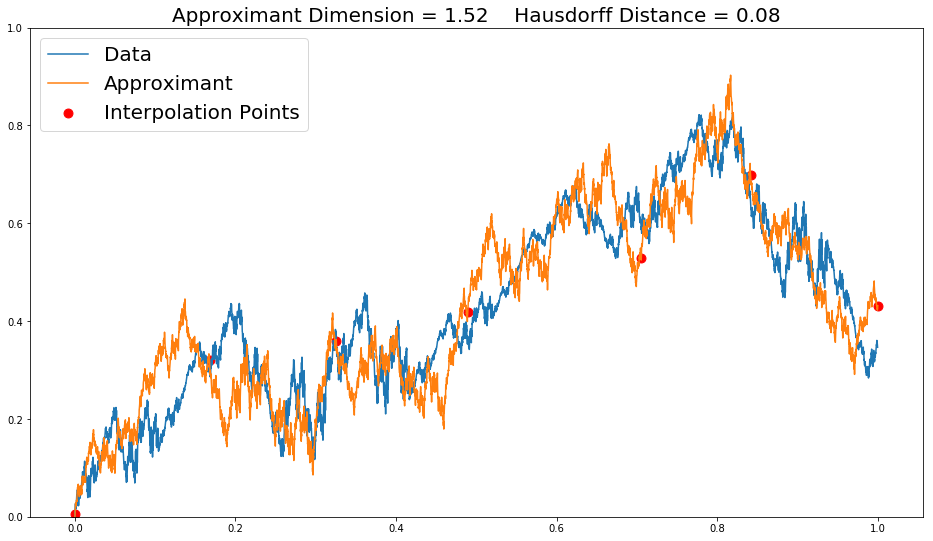

In [10]:
plt.figure(figsize=(16,9))
plt.plot(data[:,0],data[:,1], label = 'Data')
#plt.plot(initi[:,0],initi[:,1], label = '$L^2$')
plt.scatter(sol_FIF.x[:N+1],sol_FIF.x[N+1:2*N+2],s = 80,color = 'red', label = 'Interpolation Points')
plt.plot(approx[:,0],approx[:,1], label = 'Approximant')
dH = np.round(max(directed_hausdorff(approx,data)[0],directed_hausdorff(data,approx)[0]),3)
plt.ylim(0,1)
plt.title("Approximant Dimension = " + str(dim_FIF_trun) +'    ' +'Hausdorff Distance = '+ str(dH), fontsize = 20)
plt.legend(fontsize = 20)
